In [1]:
import tifffile
import zarr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sys

In [2]:
import logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [3]:
tifffile.__version__

'2022.3.16'

In [4]:
zarr.__version__

'2.11.1'

In [5]:
tif = tifffile.TiffFile("sardana/WD-76845-097.ome.tif")
s = tif.series[0]
tif_store = s.aszarr()

In [6]:
z = zarr.open(tif_store, mode="r")

In [7]:
cd = pd.read_csv("sardana/cell-WD-76845-097.csv")

In [8]:
cl = pd.read_csv("sardana/leiden_hdbscan_consensus.csv")

In [9]:
m = pd.read_csv("sardana/markers.csv")

In [10]:
ma = zarr.open(tifffile.TiffFile("sardana/cellMask.tif").aszarr(), mode="r")

In [11]:
m

,channel_number,cycle_number,marker_name,Filter,excitation_wavelength,emission_wavelength
0,1,0,Hoechst0,DAPI,395,431
1,2,0,AF488,FITC,485,525
2,3,0,AF555,Sytox,555,590
3,4,0,AF647,Cy5,640,690
4,5,1,Hoechst1,DAPI,395,431
5,6,1,A488,FITC,485,525
6,7,1,A555,Sytox,555,590
7,8,1,A647,Cy5,640,690
8,9,2,Hoechst2,DAPI,395,431
9,10,2,anti_CD3,FITC,485,525


In [12]:
cl

,CellID,Consensus_Cluster
0,47,6
1,49,6
2,51,6
3,52,6
4,53,6
...,...,...
959813,1242746,7
959814,1242748,6
959815,1242751,6
959816,1242753,6


In [13]:
cl["Consensus_Cluster"].unique()

array(['6', '16', '5', '3', '9', '7', '13', '17', '4_16', '15', '4_13',
       '1', '12', '11', '8', '10', '4_7', '14', '2', '0', '18'],
      dtype=object)

In [14]:
cd

,CellID,Hoechst0_cellRingMask,AF488_cellRingMask,AF555_cellRingMask,AF647_cellRingMask,Hoechst1_cellRingMask,A488_cellRingMask,A555_cellRingMask,A647_cellRingMask,Hoechst2_cellRingMask,...,Y_centroid,column_centroid,row_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
0,1,362.993151,828.267123,343.315068,652.842466,323.547945,784.883562,355.349315,756.650685,721.013699,...,16.794521,17926.664384,16.794521,146,19.757154,9.911892,0.865050,0.935897,0.506944,-0.964550
1,2,368.467456,880.147929,378.136095,678.573964,342.822485,796.621302,365.402367,759.100592,356.786982,...,543.976331,19121.662722,543.976331,169,16.149986,13.456914,0.552902,0.960227,0.754464,-1.192025
2,3,376.638060,919.145522,379.876866,685.891791,357.992537,861.473881,377.175373,774.276119,375.753731,...,827.253731,20627.615672,827.253731,268,25.022285,14.012230,0.828499,0.927336,0.620370,-0.235120
3,4,380.475610,940.457317,381.432927,686.719512,357.817073,864.149390,381.128049,765.963415,373.009146,...,837.073171,20611.920732,837.073171,328,35.875258,13.288510,0.928869,0.750572,0.585714,-0.028089
4,5,377.841837,942.974490,384.709184,685.076531,352.392857,863.056122,374.275510,775.913265,366.795918,...,835.576531,20601.637755,835.576531,196,23.260397,11.497359,0.869298,0.911628,0.560000,-0.103986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242751,1242752,36016.336842,8849.473684,3033.905263,1129.221053,37950.684211,2214.505263,870.042105,1557.115789,37927.968421,...,26818.968421,7104.242105,26818.968421,95,11.156316,10.868287,0.225763,0.950000,0.785124,0.336061
1242752,1242753,23205.422360,11025.291925,3764.826087,1337.142857,24161.621118,2527.944099,921.006211,1236.534161,21913.875776,...,26821.322981,6942.645963,26821.322981,161,16.165999,12.759782,0.614011,0.964072,0.728507,-1.500372
1242753,1242754,35534.086420,8966.320988,2977.691358,1183.493827,37194.790123,2233.728395,863.283951,1608.209877,37491.049383,...,26822.901235,7010.135802,26822.901235,81,12.012915,8.890512,0.672519,0.987805,0.613636,0.952358
1242754,1242755,34436.795812,10391.340314,3508.162304,1270.408377,37016.062827,2543.979058,919.445026,1343.382199,35432.481675,...,26826.319372,6924.958115,26826.319372,191,17.788878,13.849243,0.627603,0.945545,0.757937,-0.151823


In [59]:
z[0].shape

(40, 27120, 26139)

In [6]:
z[4]

<zarr.core.Array '/4' (40, 1695, 1634) uint16 read-only>

In [29]:
27120/1695

16.0

In [7]:
z[0][0, 1000:2000, 1000:2000]

array([[341, 365, 361, ..., 376, 367, 356],
       [414, 349, 330, ..., 367, 383, 393],
       [337, 356, 342, ..., 377, 377, 379],
       ...,
       [350, 373, 386, ..., 368, 341, 320],
       [340, 361, 344, ..., 322, 370, 353],
       [325, 328, 393, ..., 318, 363, 348]], dtype=uint16)

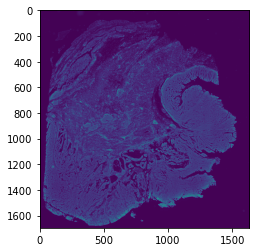

In [8]:
plt.imshow(z[4][0, ...])

In [27]:
z[0].shape

(40, 27120, 26139)

In [28]:
z[4].shape

(40, 1695, 1634)

In [11]:
x_s = 1400
y_s = 800
x_l = 100
y_l = 100
# x_s = 1000
# y_s = 1250
# x_l = 100
# y_l = 100

In [50]:
%pdb

Automatic pdb calling has been turned ON


In [12]:
b_cell_ids = cl[cl["Consensus_Cluster"] == "11"]["CellID"]

In [13]:
b_cell_ids

6907        13551
8098        15424
11877       21992
13562       24796
13882       25303
           ...   
957214    1239241
957301    1239358
957431    1239549
958605    1241117
959021    1241679
Name: CellID, Length: 49057, dtype: int64

In [14]:
def plot_dots(img, x, y, cell_data, cell_ids, channel=0):
    cell_data_sub = cell_data[
        np.isin(cell_data["CellID"], cell_ids) &
        (cell_data["X_centroid"] < y[1]) & (cell_data["X_centroid"] > y[0]) &
        (cell_data["Y_centroid"] < x[1]) & (cell_data["Y_centroid"] > x[0])
    ]
    plt.figure(figsize=(15, 15))
    if channel is None:
        plt.imshow(img[x[0]:x[1], y[0]:y[1]])
    elif channel == -1:
        pass
    else:
        plt.imshow(img[channel, x[0]:x[1], y[0]:y[1]])
    plt.scatter(x=cell_data_sub["X_centroid"] - y[0], y=cell_data_sub["Y_centroid"] - x[0], s=1, color="red")

In [15]:
x_slice = (x_s*16, (x_s + x_l)*16)
y_slice = (y_s*16, (y_s + y_l)*16)
print(x_slice, y_slice)

(22400, 24000) (12800, 14400)


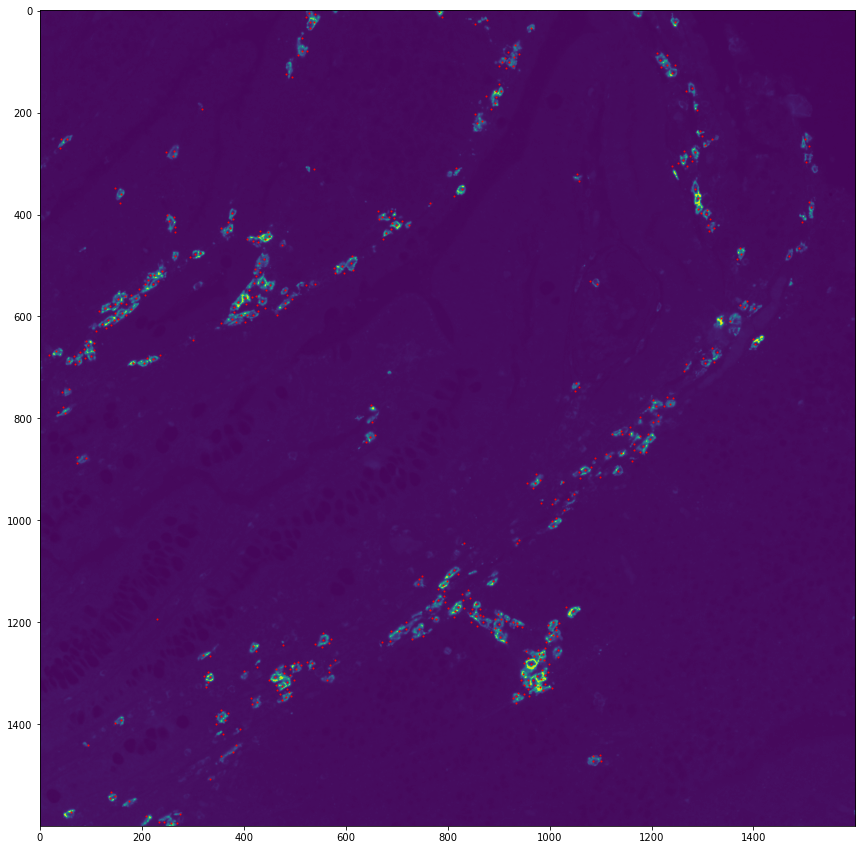

In [16]:
plot_dots(z[0], y_slice, x_slice, cd, b_cell_ids, channel=21)

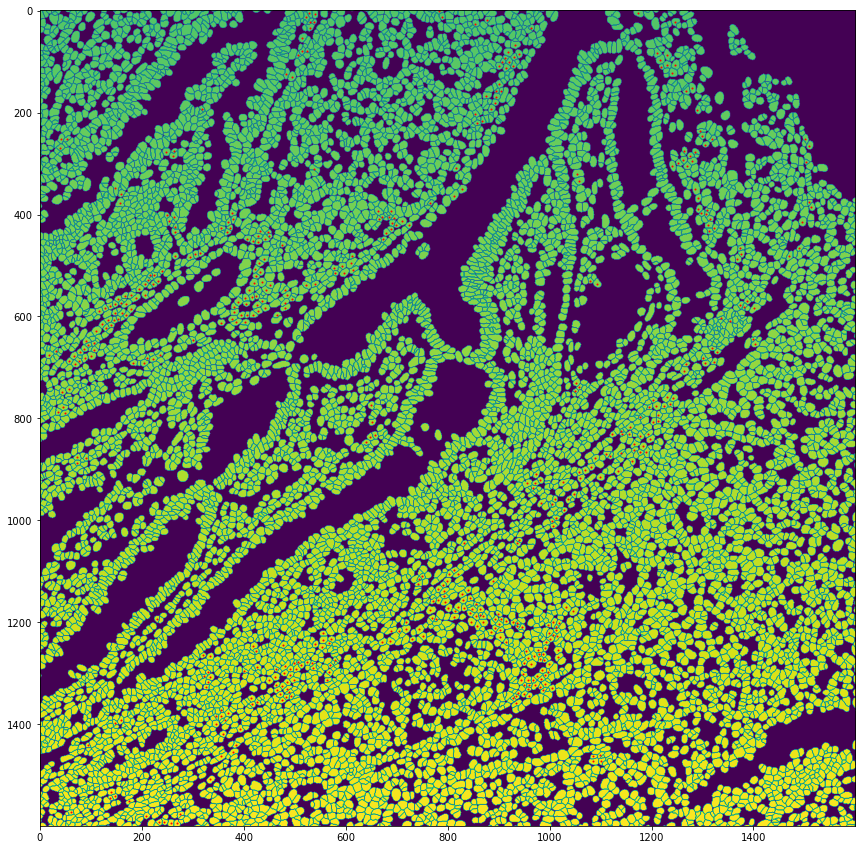

In [51]:
plot_dots(ma, y_slice, x_slice, cd, b_cell_ids, channel=None)

In [148]:
z_sub = z[0][:, y_s*16:(y_s + y_l)*16, x_s*16:(x_s + x_l)*16]

In [149]:
z_sub.shape

(40, 1600, 1600)

In [150]:
tifffile.imwrite("img_sub.tiff", z_sub)

In [41]:
ma_sub = ma[y_s*16:(y_s + y_l)*16, x_s*16:(x_s + x_l)*16]

In [152]:
tifffile.imwrite("ma_sub.tiff", ma_sub)

In [7]:
import redsea
import inspect

In [12]:
np.unique(ma_sub)

NameError: name 'ma_sub' is not defined

In [8]:
redsea.run_redsea(
    "img_sub.tiff", "ma_sub.tiff", "sardana/markers.csv", "test", ["CD20_488"]
)

INFO:root:Reading image
INFO:root:Reading segmentation mask
INFO:root:Quantifying markers before correction
INFO:root:Creating cell-cell contact matrix
INFO:root:Performing correction
Progress: |██████████████████████████████████████████████████| 100.0% Complete
INFO:root:Writing output files to /n/scratch3/users/c/ch305/redsea/test


In [21]:
inspect.getsource(redsea.run_redsea)

'def run_redsea(\n    tiff,\n    seg_mask,\n    markers_csv,\n    output_dir,\n    markers_of_interest=None,\n    boundary_mode=2,  # Ignored atm\n    compensation_mode=1,\n    element_shape=2,\n    element_size=2,\n):\n    # parameters for compensation\n    # boundary_mode = boundaryMod = 2 # 2 means boundary, 1 whole cell\n    # compensation_mode = REDSEAChecker = 1 # 1 means subtract+ reinforce\n    # element_shape = elementShape = 2 # star, 1 == square size\n    # element_size = elementSize = 2 # star or square extension size\n    massDS = pd.read_csv(markers_csv)  # read the mass csv\n    if "marker_name" not in massDS.columns:\n        # Assume that csv only has a single column with the marker names\n        # and no header\n        massDS = pd.read_csv(markers_csv, header=None)\n        massDS.columns = ["marker_name"]\n\n    if markers_of_interest is None:\n        markers_of_interest = markers\n    normChannels = markers_of_interest\n    #### should be inside the function\n   

In [ ]:
qb = pd.read_csv("test/single_cell_before_redsea.csv")
qa = pd.read_csv("test/single_cell_after_redsea.csv")

In [ ]:
qb

In [19]:
qa.columns

Index(['Unnamed: 0', 'CellID', 'cell_size', 'Hoechst0', 'AF488', 'AF555',
       'AF647', 'Hoechst1', 'A488', 'A555', 'A647', 'Hoechst2', 'anti_CD3',
       'anti_NaKATPase', 'anti_CD45RO', 'Hoechst3', 'Ki67', 'Keratin', 'aSMA',
       'Hoechst4', 'CD4', 'CD45_PE', 'PD1', 'Hoechst5', 'CD20', 'CD68', 'CD8a',
       'Hoechst6', 'CD163', 'FOXP3', 'PDL1', 'Hoechst7', 'Ecad', 'Vimentin',
       'CDX2', 'Hoechst8', 'LaminABC', 'Desmin', 'CD31', 'Hoechst9', 'PCNA',
       'Ki67.1', 'CollagenIV', 'x_centroid', 'y_centroid'],
      dtype='object')

[]

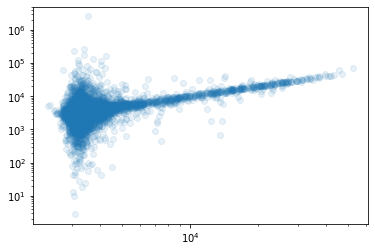

In [50]:
plt.scatter(
    qb["CD20"], qa["CD20"], alpha=0.1
)
plt.loglog()

[]

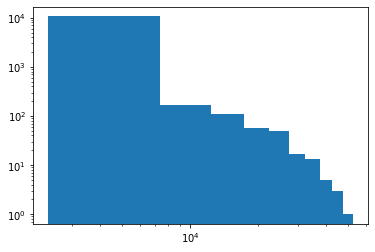

In [22]:
plt.hist(qb["CD20"])
plt.loglog()

In [30]:
increased = (qb["CD20"] < 5e4) & (qa["CD20"] > 2e4)

In [31]:
np.sum(increased)

195

In [33]:
cd_sub = cd[
        (cd["X_centroid"] < y_slice[1]) & (cd["X_centroid"] > y_slice[0]) &
        (cd["Y_centroid"] < x_slice[1]) & (cd["Y_centroid"] > x_slice[0])
]

In [48]:
len(cd_sub)

4062

In [44]:
len(np.unique(ma_sub))

11106

In [52]:
len(qb)

11053

In [45]:
ma_sub

array([[336844,      0, 337355, ...,      0,      0,      0],
       [     0, 337355, 337355, ...,      0,      0,      0],
       [337355, 337355, 337355, ...,      0,      0,      0],
       ...,
       [460646, 460646, 460646, ..., 461004, 461004,      0],
       [460646, 460646, 460646, ..., 461004,      0, 461070],
       [460646, 460646, 460646, ...,      0, 461070, 461070]],
      dtype=uint32)

In [ ]:
def match_cell_ids(df, mask):
    original_ids = np.unique(mask)
    df["original_id"] = original_ids["

In [35]:
cd_sub["increased"] = increased

/tmp/ipykernel_1303/1648474623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_sub["increased"] = increased


In [38]:
cd_sub

,CellID,Hoechst0_cellRingMask,AF488_cellRingMask,AF555_cellRingMask,AF647_cellRingMask,Hoechst1_cellRingMask,A488_cellRingMask,A555_cellRingMask,A647_cellRingMask,Hoechst2_cellRingMask,...,column_centroid,row_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,increased
1053340,1053341,15471.048246,3905.535088,1244.232456,811.504386,23862.688596,1712.557018,566.236842,1047.644737,24430.679825,...,14092.916667,22401.482456,228,27.948707,11.142588,0.917090,0.883721,0.703704,-0.087917,NaN
1053425,1053426,10368.371648,5403.835249,1764.961686,904.839080,15084.095785,1806.954023,590.570881,987.057471,16293.639847,...,14147.674330,22400.524904,261,23.140963,14.413690,0.782330,0.970260,0.725000,0.190820,NaN
1053610,1053611,16289.696000,3922.104000,1363.276000,845.824000,24091.996000,1906.748000,608.232000,1043.788000,21957.024000,...,13126.372000,22402.216000,250,23.795989,13.663611,0.818716,0.950570,0.639386,0.374923,NaN
1053614,1053615,11391.485380,4022.596491,1292.912281,809.871345,17198.204678,1718.479532,556.678363,1032.578947,18002.298246,...,14013.485380,22402.052632,171,20.234496,11.410082,0.825848,0.881443,0.581633,0.188968,NaN
1053615,1053616,21857.432258,3778.522581,1201.832258,807.367742,35751.367742,1654.103226,554.432258,1053.200000,36248.670968,...,14109.929032,22401.187097,155,20.119683,10.018192,0.867217,0.928144,0.640496,-0.058092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157393,1157394,788.579710,966.405797,413.652174,696.913043,836.391304,803.463768,342.144928,804.304348,815.623188,...,13537.884058,23799.927536,69,14.204150,6.417898,0.892103,0.907895,0.530769,1.008189,NaN
1157502,1157503,1545.543353,8210.670520,3586.289017,1693.895954,837.739884,815.127168,321.664740,776.265896,827.780347,...,13531.421965,23805.687861,173,19.400449,11.987509,0.786258,0.905759,0.569079,0.977944,NaN
1158047,1158048,832.019481,1045.629870,452.961039,711.616883,954.649351,824.084416,328.649351,766.792208,990.772727,...,13518.246753,23814.435065,154,15.455266,12.906843,0.550083,0.956522,0.687500,-0.226971,NaN
1159272,1159273,901.403390,956.606780,398.681356,690.935593,1190.050847,818.850847,328.545763,773.227119,1349.311864,...,13490.911864,23837.176271,295,22.333811,16.899999,0.653762,0.954693,0.712560,-1.439962,NaN


In [39]:
increased

0        False
1        False
2        False
3        False
4        False
         ...  
11048    False
11049     True
11050     True
11051    False
11052    False
Name: CD20, Length: 11053, dtype: bool